### Задание по пандасу

Гладков Григорий

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%config Completer.use_jedi = False

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 

### Первое

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Serfentum/bf_course/master/14.pandas/train.csv')
df

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,337,8056,7542,471,58,7,NaN,63.0,47.0,367.0,NaN,0.004584,0.045444,0.007767
59,338,8061,7967,62,29,5,17.0,NaN,26.0,33.0,0.001060,0.002207,0.003992,NaN
60,339,8062,8002,48,14,3,14.0,14.0,33.0,NaN,0.001076,0.002953,NaN,0.001322
61,340,8061,7918,146,16,4,NaN,75.0,43.0,33.0,NaN,0.005307,0.002951,0.008808


In [6]:
df_nucl = df[['pos', 'A', 'C', 'T', 'G']]
df_nucl = df_nucl[['A', 'C', 'T', 'G']].fillna(0)
total_sum = df_nucl[['A', 'C', 'T', 'G']].values.sum()
df_nucl['Sum'] = df_nucl[['A', 'C', 'T', 'G']].sum(axis=1)
df_nucl = df_nucl[['A', 'C', 'T', 'G']].div(df_nucl['Sum'], axis=0)
df_nucl['position'] = df['pos']
df_same = df_nucl
df_same = df_same.set_index('position')
df_same

,A,C,T,G
position,,,,
279,0.991851,0.006770,0.001379,0.000000
280,0.000000,0.333333,0.270833,0.395833
281,0.000000,0.461538,0.076923,0.461538
282,0.205479,0.021526,0.772994,0.000000
283,0.270588,0.000000,0.547059,0.182353
...,...,...,...,...
337,0.000000,0.132075,0.098532,0.769392
338,0.223684,0.000000,0.342105,0.434211
339,0.229508,0.229508,0.540984,0.000000


<AxesSubplot:xlabel='position'>

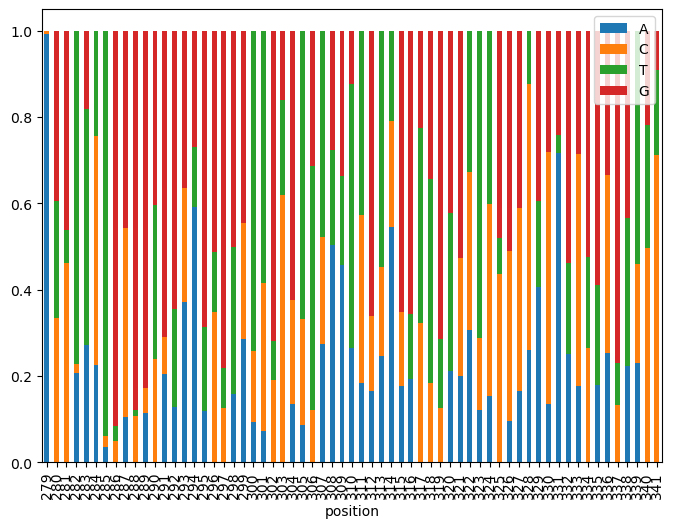

In [7]:
df_same.plot(kind='bar', stacked=True)

### Второе

In [8]:
med_matches = sum(df['matches']) / len(df['matches'])
df_red =df[['pos', 'reads_all', 'mismatches', 'deletions', 'insertions', 'matches']].loc[df['matches'] > med_matches]
df_red.to_csv('/home/gladkov/storage/trash/BI/PY/train_part.csv', index=False)

### EDA по Титанику

In [9]:
train = pd.read_csv('/home/gladkov/storage/trash/BI/PY/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Как распределены пассажиры по классам и по полу?

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

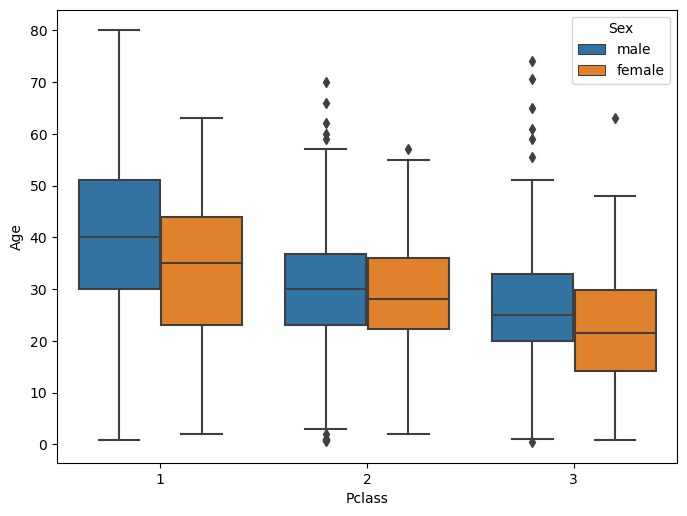

In [11]:
sns.boxplot(x='Pclass', y='Age', hue = "Sex", data=train)

Пасажжиры из более высоких классов старше, женщины моложе, чем мужчины.

Что со смертностью в зависимости от пола?

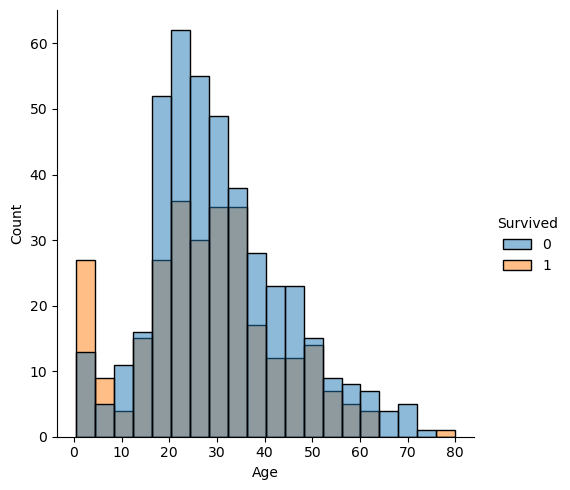

In [12]:
sns.displot(train, x="Age", hue="Survived")

Кроме пика на моде 20-25 лет есть пик на детях. При том, что была тенденция 
спасать детей.

То же, но с разбивкой на классы и пол.

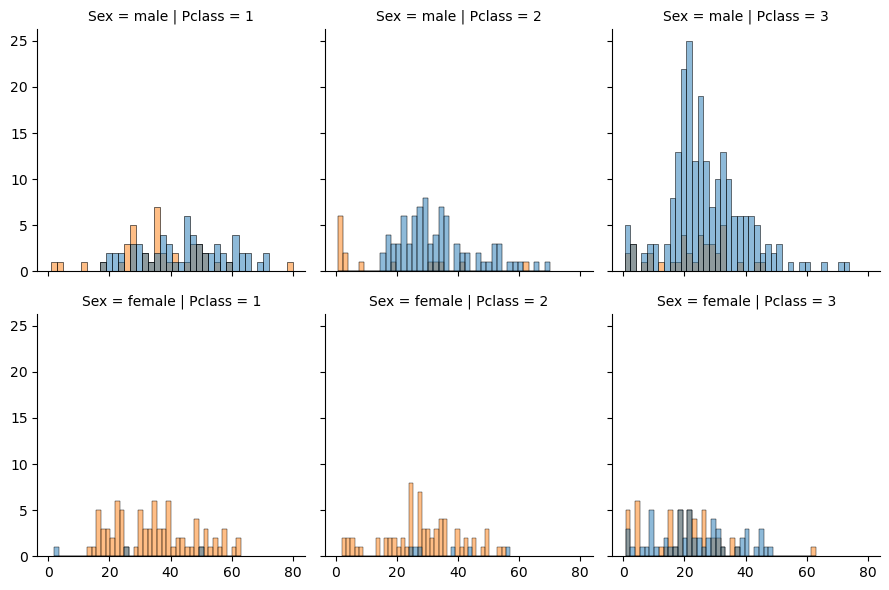

In [16]:
g = sns.FacetGrid(train, row="Sex", col="Pclass")
g.map_dataframe(sns.histplot, x="Age", hue="Survived", bins=40)

Похоже мода на 20-25 годах это толпа погибших мужчин из третьго класса.F

Кажется, что в третьем классе неохотно спасали детей мальчиков, чем девочек. Проверим.

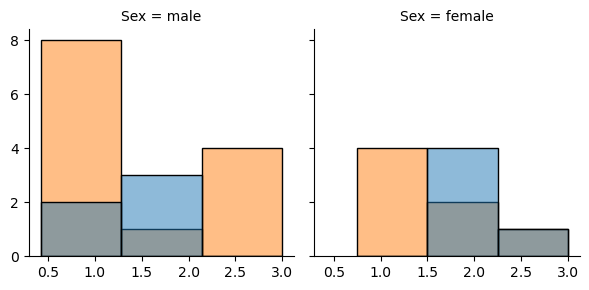

In [25]:
poor_kids = train.query("Pclass == 3" and "Age <= 3")
g_kids = sns.FacetGrid(poor_kids, col="Sex")
g_kids.map_dataframe(sns.histplot, x="Age", hue="Survived", bins=3)

Похоже выбрки слишком малы, чтоьы говорить о какой-либо закономерности.

Зависит ли стоимось билета от возраста и пола?

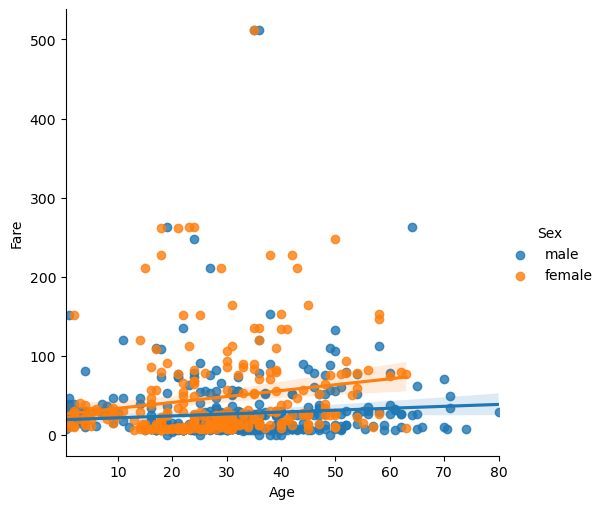

In [34]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Sex")

In [ ]:
Miss или Missis

Похоже "сверхдорогих" билетов для женщин было взято больше, чем для мужчин. 



Сколько незамужних женщин?

In [97]:
train_marr = train
train_marr['Unmarried'] = train[train["Sex"] == 'female'].Name.str.contains('Miss', case=True, regex=True)
train_marr['Married'] = train[train["Sex"] == 'female'].Name.str.contains('Mrs', case=True, regex=True)
train_marr = train_marr[['Unmarried', 'Married',  'Survived']].dropna(thresh=2)
unm = train_marr['Unmarried'].sum()
unm

182

Из них процент утонувших?

In [105]:
train_marr.query('Survived == 0').Unmarried.sum() / unm * 100

30.21978021978022

Замужних?

In [106]:
mrd = train_marr['Married'].sum()
mrd

129

Из них процент утонувших?

In [107]:
train_marr.query('Survived == 0').Unmarried.sum() / mrd * 100

42.63565891472868

Очевидно нужно добавить щепотку статистики, но предварительный вывод - брак увеличивает вероятность утонуть.

Посмотрим на корреляцию численных фичей всех на всех.

<AxesSubplot:>

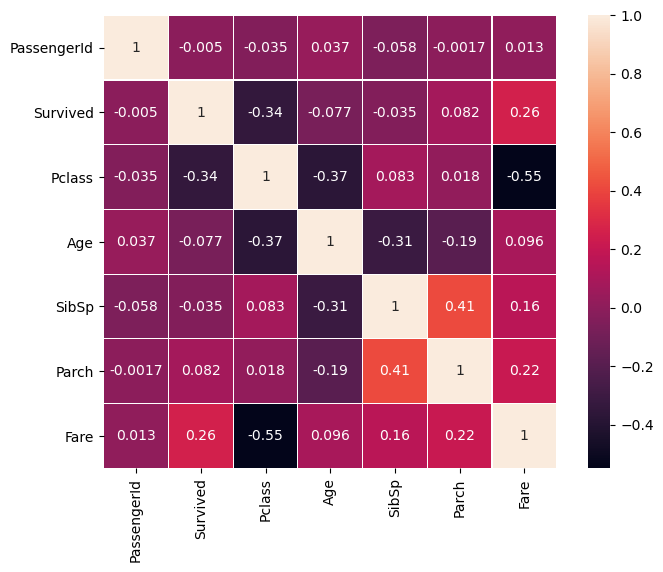

In [49]:
train_float = train.select_dtypes(exclude=['object']).astype(float)
sns.heatmap(train_float.corr(),linewidths=0.1, square=True,  linecolor='white', annot=True)
